Kaggle Data: [Global Shark Attacks Dataset](https://www.kaggle.com/teajay/global-shark-attacks)

Each row corresponds to a shark attack. Columns:

 - Case Number
 - Date
 - Year
 - Type
 - Country
 - Area
 - Location
 - Activity
 - Name
 - Sex 
 - Age
 - Injury
 - Fatal (Y/N)
 - Time
 - Species 
 - Investigator or Source

##

In [36]:
443.84/8

55.48

In [35]:
## Make sure to use 

In [ ]:
## https://pypi.python.org/pypi/textblob

## Importing Libraries

In [9]:
import pandas as pd
from textblob import TextBlob
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
import re

%matplotlib inline


In [15]:
shark_df = pd.read_csv('data/attacks.csv')

In [16]:
shark_df.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,11-Jun-17,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,10-Jun-17,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,...,N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0
2,2017.06.10.a,10-Jun-17,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,...,N,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0


## Exploring and Cleaning Data

### Removing Unneeded Columns 

In [17]:
shark_df = shark_df.drop(['Case Number', 'Name', 'Investigator or Source', 
                                  'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2',
                                  'original order'], axis=1)

In [18]:
shark_df.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,11-Jun-17,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m"
1,10-Jun-17,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,F,NaN,"No injury, knocke off board",N,15h45,7 gill shark
2,10-Jun-17,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,M,19,Laceration to left foot,N,10h00,NaN
3,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,NaN,"3m shark, probably a smooth hound"
4,04-Jun-17,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,M,NaN,Laceration to shin,N,NaN,8' shark


### Cleaning Age

In [26]:
shark_df['isAge'] = shark_df['Age'].apply(lambda x: str(x).isdigit())
shark_df[['isAge', 'Age']].head()

,isAge,Age
0,True,48
1,False,NaN
2,True,19
3,True,30
4,False,NaN


In [27]:
# Removing Rows where you don't have a Age
shark_df = shark_df[shark_df['isAge'] == True]

In [28]:
shark_df.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,isAge
0,11-Jun-17,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,M,48,"No injury, board bitten",N,08h30,"White shark, 4 m",True
2,10-Jun-17,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,M,19,Laceration to left foot,N,10h00,NaN,True
3,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,NaN,"3m shark, probably a smooth hound",True
5,02-Jun-17,2017.0,Unprovoked,BAHAMAS,New Providence,Athol Island,Snorkeling,F,32,Right forearm severed,N,Shortly before 12h00,Tiger shark,True
6,30-May-17,2017.0,Provoked,USA,South Carolina,"Awendaw, Charleston County",Touching a shark,F,20,Right hand bitten by hooked shark PROVOKED INC...,N,NaN,3' shark,True


TypeError: cannot concatenate 'str' and 'float' objects

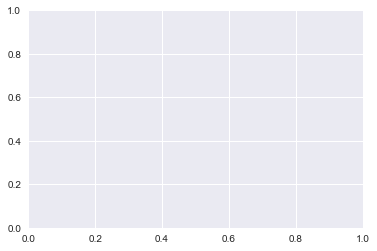

In [19]:
#Plot the distribution of ages
fig = sns.distplot(shark_df['Age'])
ax = fig.axes
ax.set_xlim(0,)

### Keeping US Data Only

In [ ]:
'USA'

In [ ]:
data = data[data['Fatal (Y/N)'] != "UNKNOWN"]
data['Fatal (Y/N)'].value_counts()